<a href="https://colab.research.google.com/github/pronsSec/Acoustic-Fire-Extinguisher-Analysis/blob/main/Acoustic_Fire_Extenguisher_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---


# Acoustic Fire Extinguisher Dataset Analysis
Here we will explore this dataset and get a primer of how to do Exploratory Data Analysis with Python.


---



---


---




In [ ]:
#do not run this block
Data properties and descriptions for liquid fuels
FEATURES MIN/MAX VALUES UNIT DESCRIPTIONS
SIZE 7, 12, 14, 16, 20 cm Recorded as 7 cm=1, 12 cm=2, 14 cm=3, 16 cm=4, 20 cm=5
FUEL Gasoline, Kerosene, Thinner Fuel type
DISTANCE 10 - 190 cm
DESIBEL 72 - 113 dB
AIRFLOW 0 - 17 m/s
FREQUENCY 1-75 Hz
STATUS 0, 1 0 indicates the non-extinction state, 1 indicates the extinction state

Data properties and descriptions for LPG
FEATURES MIN/MAX VALUES UNIT DESCRIPTIONS
SIZE Half throttle setting, Full throttle setting Reocerded as Half throttle setting=6, Full throttle setting=7
FUEL LPG Fuel type
DISTANCE 10 - 190 cm
DESIBEL 72 - 113 dB
AIRFLOW 0 - 17 m/s
FREQUENCY 1-75 Hz
STATUS 0, 1 0 indicates the non-extinction state, 1 indicates the extinction state


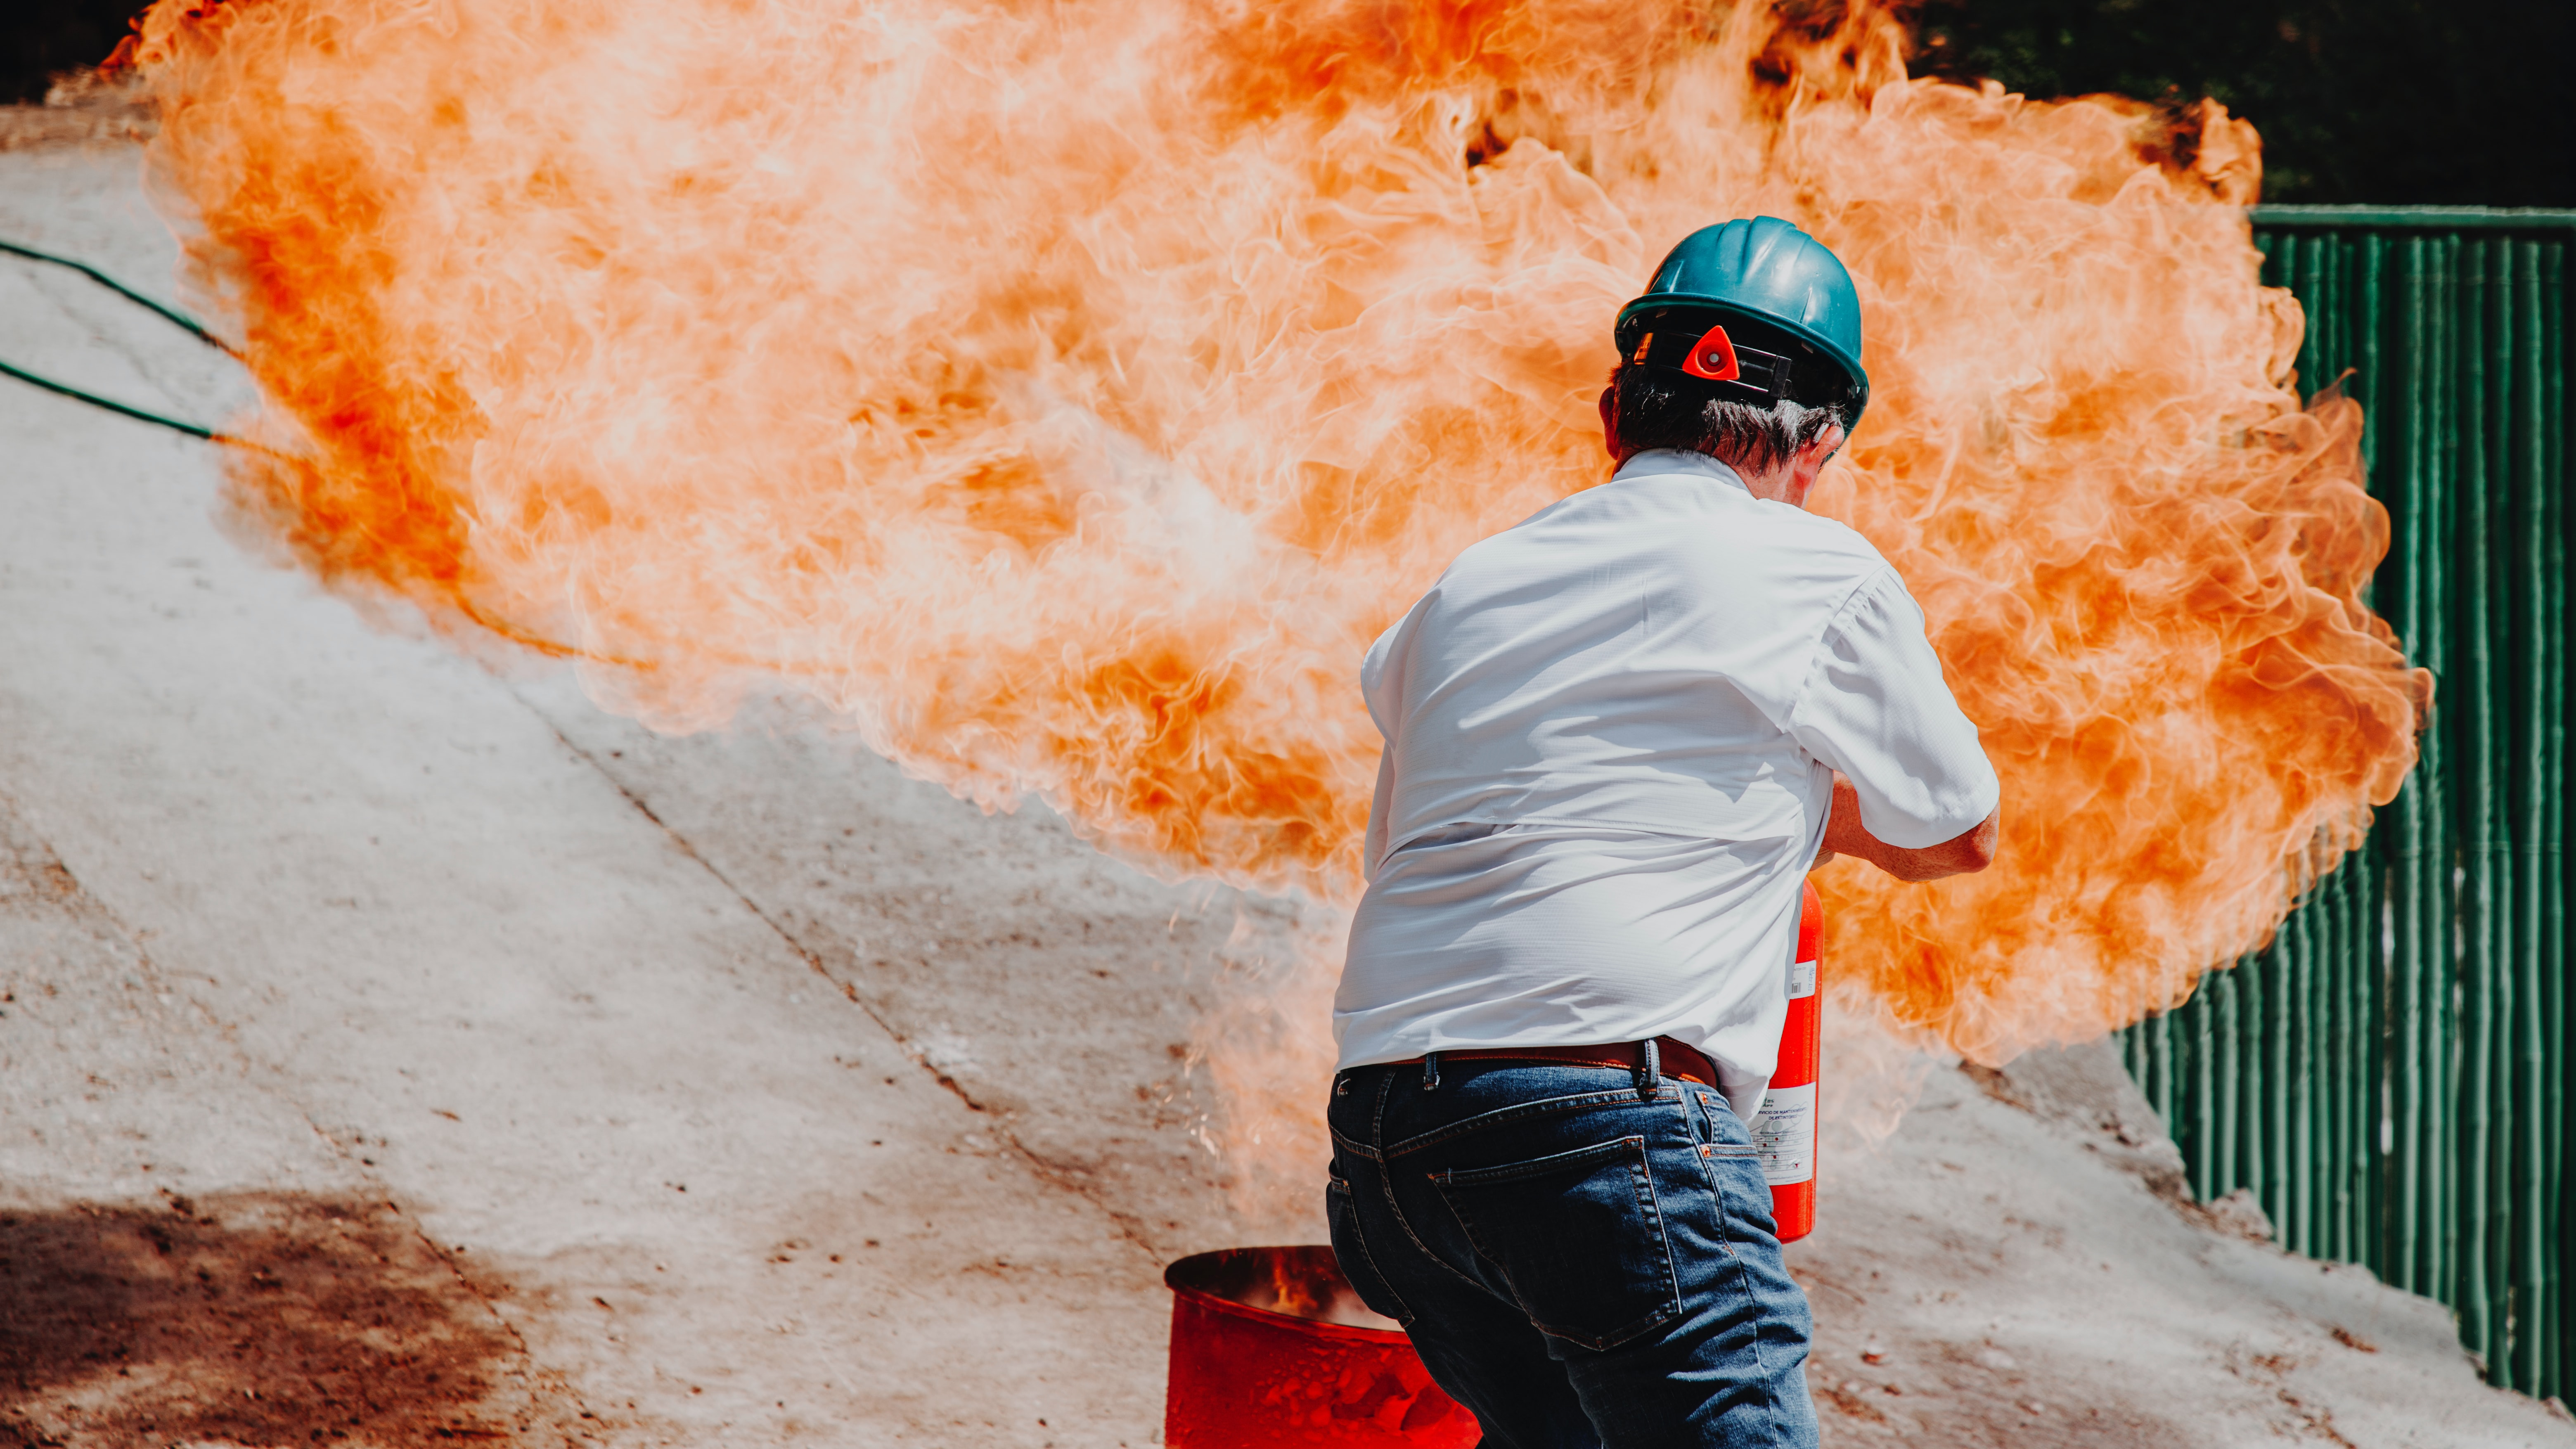

In [2]:
#first we add our template for imports 
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile
from IPython.display import clear_output
# Data Manipulation 
import numpy as np
import pandas as pd
!pip install skimpy
from skimpy import skim
# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline
#we will likely not use all of these.. oops some are old now  
clear_output()

# Load data and check dataframe


---


This is where we will begin to work the data. Think of a pie crust being spun by a pizza person. You gotta work it. 

We will be doing summary stats, checking for nulls, and determining what fields (columns) are categorical and which are numerical. 


---



In [3]:
data = pd.read_excel('/content/Acoustic_Extinguisher_Fire_Dataset.xlsx')

In [4]:
data.head()
#so we now know that this loaded and is in the dataframe ... but what do they mean ??

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [5]:
data.shape #this shows the shape of the dataframe

(17442, 7)

In [6]:
data.describe() #this is for numerical fields

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [7]:
data.describe(include=['O']) # this is for categorical fields

,FUEL
count,17442
unique,4
top,gasoline
freq,5130




---


So now we have summary stats. Fuel is our only categorical field, and this is now confirmed above. So we want to exlore a bit further. 

Skim , which is used below, is one of the best packages I have in my toolbelt. It makes for an extremely concise layout of summary stats versus the describe() used above. 

Either works!


---



In [8]:
#now the good stuff.. summary stats and simple stats.. this is where we begin to feel out the fields(columns)
#skimpy is a fantastic library that does this for us versus manually doing it
skim(data)


╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 17442  │ │ int64       │ 5     │                                    │
│ │ Number of columns │ 7      │ │ object      │ 1     │                                    │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━┳━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃            ┃ missing  ┃ complete rate  ┃ mean ┃ sd  ┃ p0 ┃ p25 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━╇━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ SIZE       │        0 │              1 │  3.4 │ 1.8 │  1 │   2 │   5 │    7 │ █████▅ │  │
│ │ DISTANCE   │        0 │              1 │  100 │  55 │ 10 │  50 │ 150 │  190 │ ▆▆▆▆▆█ │  │
│ │ DESIBEL    │        0 │              1 │   96 │ 8.2 │ 72 │  90 │ 100 │  110 │ ▁▁█▅▇▃ │  │
│ │ AIRFLOW    │        0 │              1 │    7 │ 4.7 │  0 │ 3.2 │  11 │   17 │ ▇█▄▅▅▃ │  │
│ │ FREQUENCY  │        0 │              1 │   32 │  21 │  1 │  14 │  47 │   75 │ █▇▆▆▂▄ │  │
│ │ STATUS     │        0 │              1 │  0.5 │ 0.5 │  0 │   0 │   1 │    1 │ █    █ │  │
│ └────────────┴──────────┴────────────────┴──────┴─────┴────┴─────┴─────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯



---


So as we can see.. there is really only one categorical variable ... that is the variable for fuel type. The rest are continuous/discrete numerical values. This is fine. We can bin some of the continuous variables to make them discrete if needed. But first we need to check distributions to see if they are possibly discrete already. 




Before that we begin that let's check for nulls (this is done by skim but I wanted to show missingno() and how it works. 



---



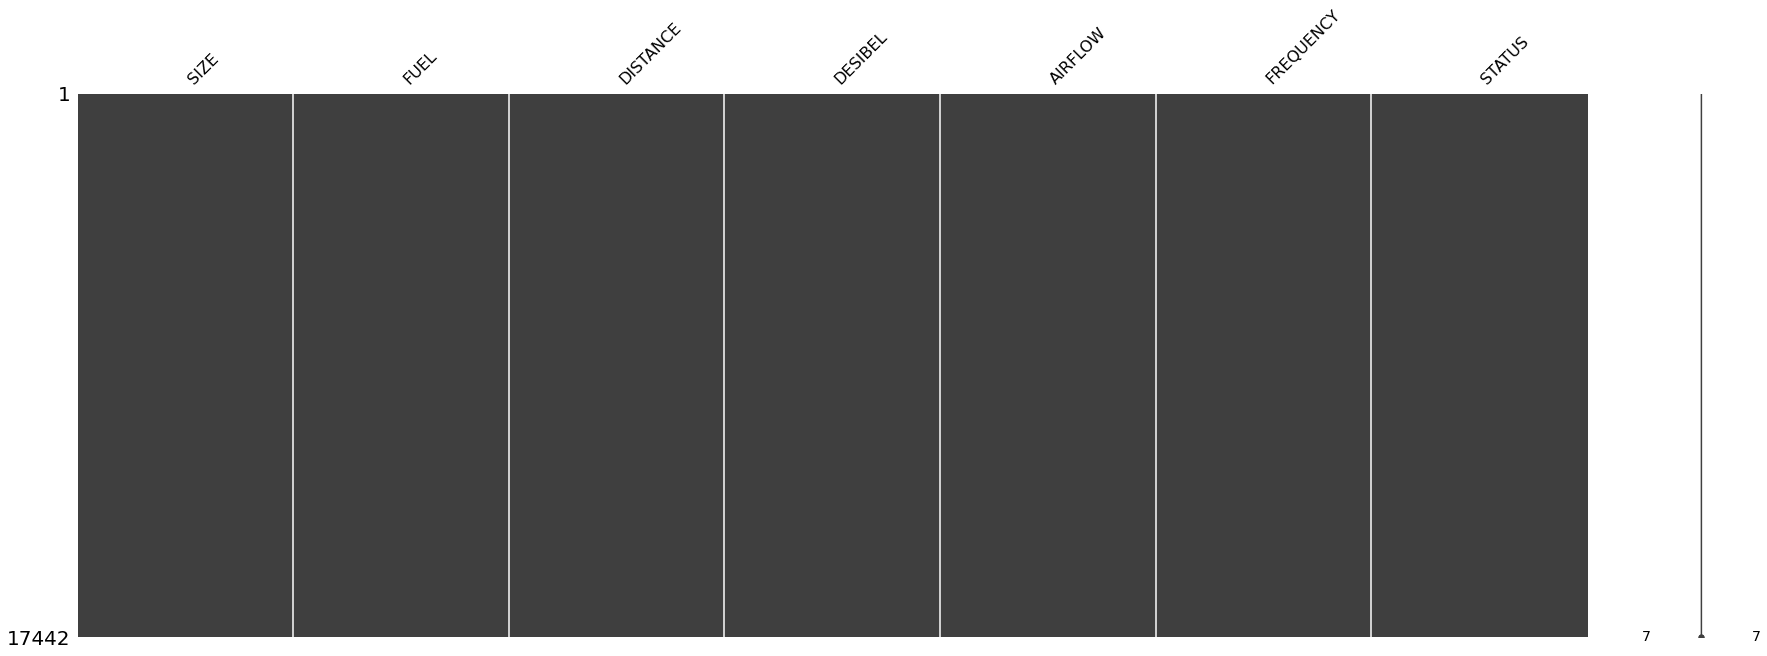

In [9]:
missingno.matrix(data, figsize=(30,10))

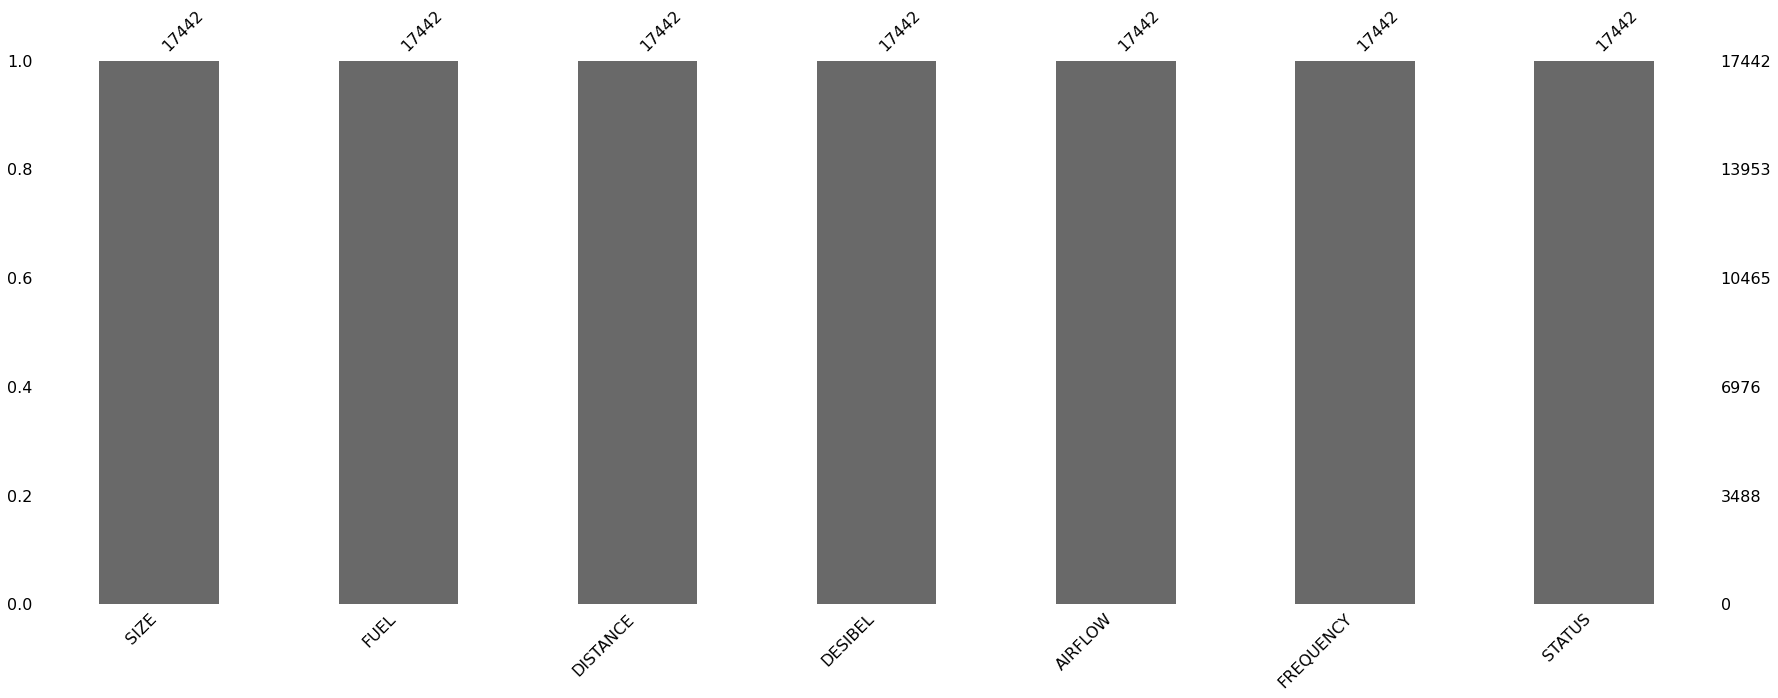

In [10]:
missingno.bar(data, sort='ascending', figsize=(30,10))

# Feature Engineering


---


So this is great. All of our data is there, and we do not have to fill nulls. This is the benefit of pre-cleaned datasets. Generally you will need to do the cleaning, and fill nulls. That is a lesson all by itself. 


---



In [11]:
#let's make two dataframes ... one for binned discretized continuous variables, and one for the continuous variables unchanged
bin = pd.DataFrame()
con = pd.DataFrame()



---


Next we want to use this fantastic function to plot the distribution of our entire df simultaneously. Borrow this, it saves an entire hour. This will help us see which fields are discrete versus continuous. This can be hard to determine unless you are relatively experienced, so the visuals will help. 

Discrete numerical fields will have clear seperations between their distribution, and continuous will not. This will make more sense in a second. 


---



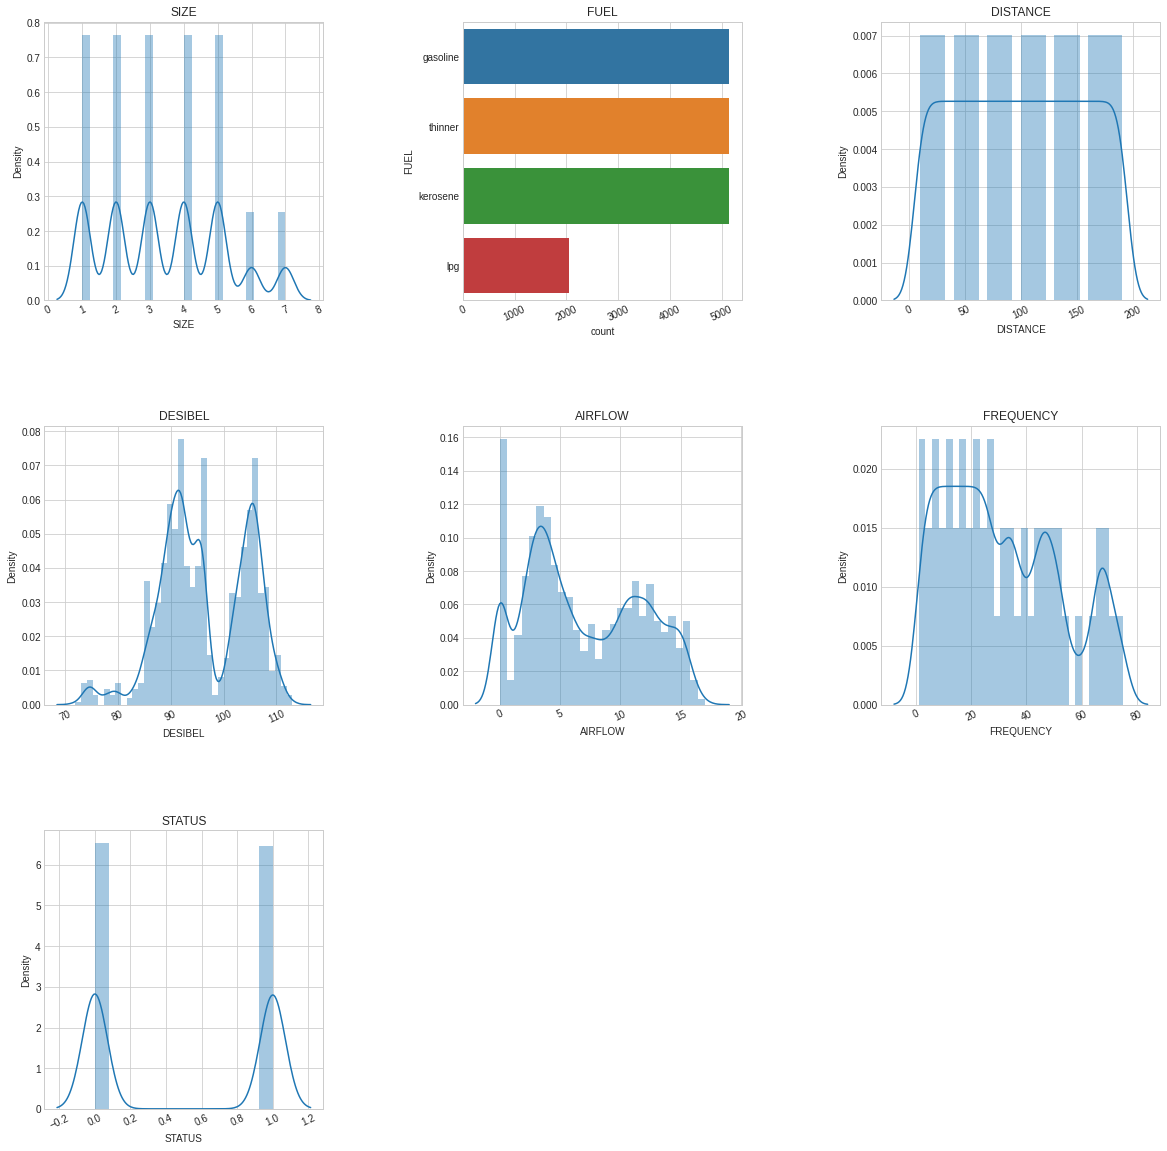

In [12]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(data, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)



---


So with this we can confirm that Status, Distance, and Size fields are discrete numerical fields. The rest are continuous, and fuel is categorical as mentioned earlier.

Now from here we have fields to work with. I am going to keep it simple and make Decibels the target feature. This will allow for simple visualizations to begin to show the relationships between the data. 




---



# **Target Feature: DESIBEL **

(It is desibel in the original dataset... this may be European. We are going to assume it is European. It references decibels.)

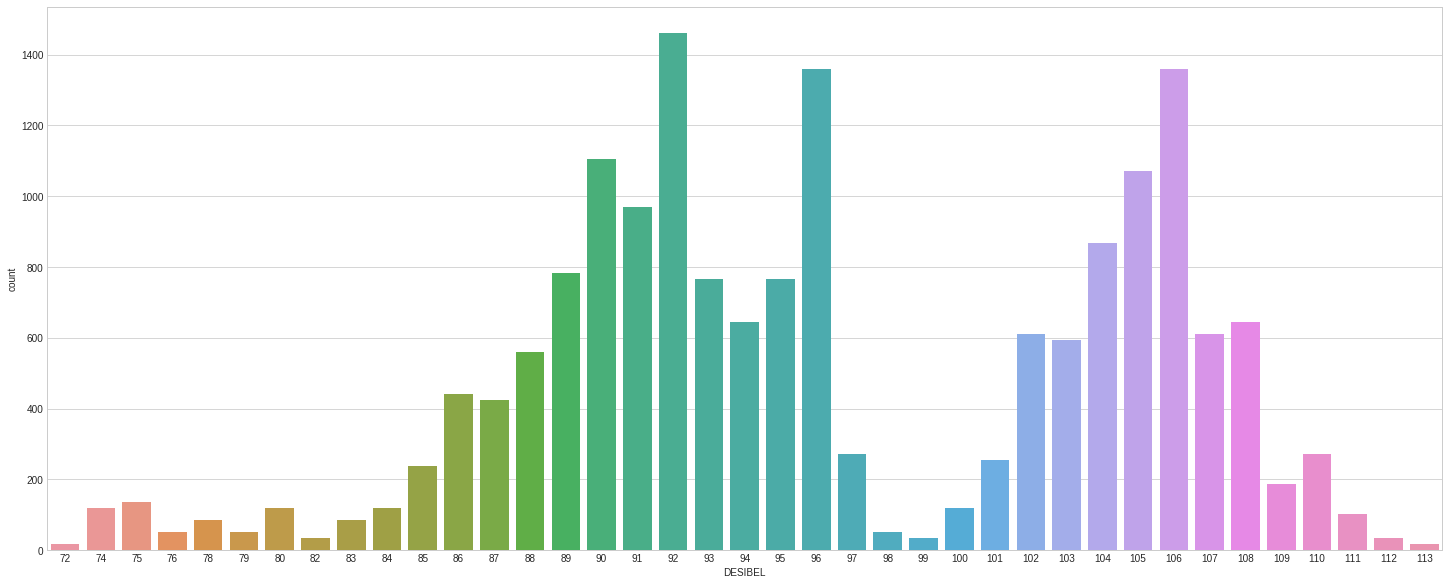

In [13]:
# count of variable , x or y , either is fine.. this is best for only the target feature versus the other subsequent features
fig = plt.figure(figsize=(25,10))
sns.countplot(x='DESIBEL', data=data);



So, we can see that there is a pretty broad range of decibels used. This has no value until we can compare it to another field, but it is good to know. Half of exploratory analysis is just taking the time to understand the data. Sometimes the visuals are for you. 
---

Lets take a look at our target feature versus another continuous field: Airflow. 

---



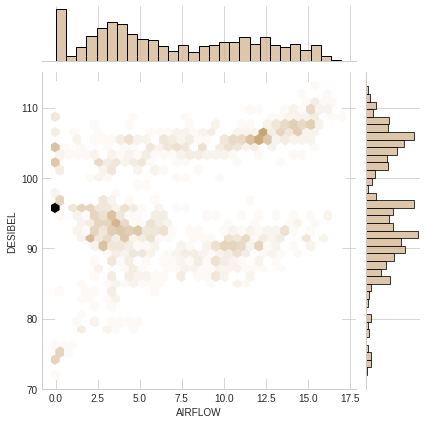

In [19]:
sns.jointplot(data=data, x="AIRFLOW", y='DESIBEL',kind='hex', color='tan') #we can see some relation here but let's try something different below

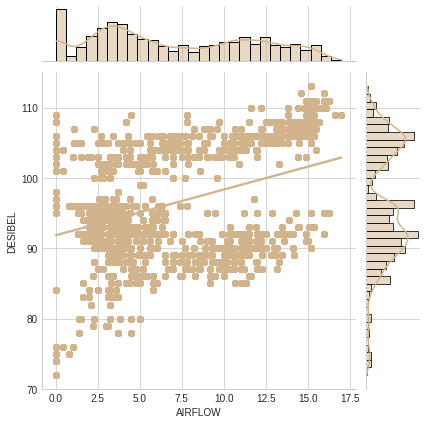

In [27]:
sns.jointplot(data=data, x="AIRFLOW", y='DESIBEL',kind='reg', color='tan')
# this gives us Linear regression with marginal distributions

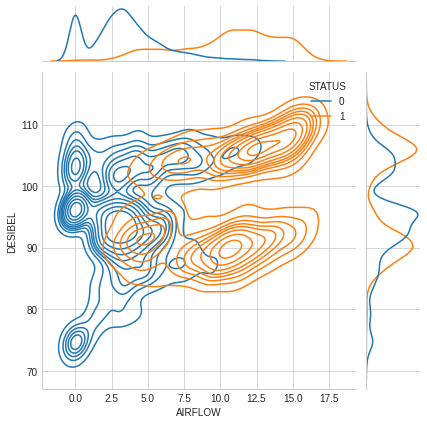

In [29]:
sns.jointplot(data=data, x="AIRFLOW", y='DESIBEL',kind='kde', color='tan', hue='STATUS')
#so now we want to confirm this a bit more clearly... does the trend above relate to fires going out? Well we do not know until we check... 
#the hue being the status will show this.. keep in mind that 1 represents fire extinction

So as we can see there .. there is a notable trend. Increased airflow and increased desibels have a positive relationship with the status aka if the fire goes out. 

This is it. This is what you do the math to find. 

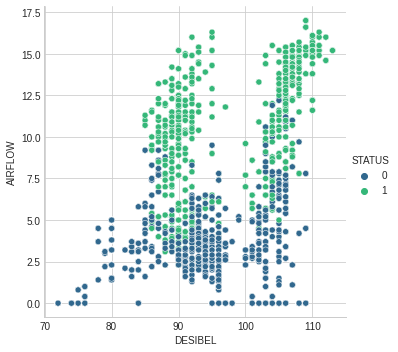

In [39]:
# Just another way to visualize... relplots are great ways to view bivariate relationships...the hue is very valuable
sns.relplot(data=data, x="DESIBEL", y='AIRFLOW', hue='STATUS', palette='viridis')

#And this is where you will continue. You would generally do this for each feature if you are doing scientific analysis. Comparing each feature against the target feature. If it is a business analysis you will have specific cases to investigate and will no directly what to work on. 


---

We do want to have some numbers behind the graphs and code ... so below we will measure the covariance and Spearman correlation. 
We are using Spearman versus Pearson because this is non-Gaussian data. Neither of these fields are random data. The distributions are non-normal because it is a scientific test and a tester is determining the values. Things like population would generally be normally distributed and are actually random, but scientific data is often non-normal (non-Gaussian) and does not follow the law of large numbers in most cases unless it is an observation. 



You can absolutely use Pearson in this scenario though. This is because the data does have linear relation. But, tbh, most people will have no need for this as part of an exploratory analyis. The statisticians will take it personally no matter which you choose ;p

We will get into nominal versus ordinal etc later in the course. For now just google what these are and how they work

---


Covariance
Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples.

This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted).

In [42]:
# the covariance between decibel and status 

from numpy import cov
covariance = cov(data['DESIBEL'], data['STATUS'])
print(covariance)

[[66.65247015  0.83263043]
 [ 0.83263043  0.25000959]]


In [43]:
#covariance between desibel and airflow

covariance = cov(data['DESIBEL'], data['AIRFLOW'])
print(covariance)

[[66.65247015 14.57401155]
 [14.57401155 22.43129661]]


Yeah this is impossible to read, but basically it's positive. I'll have a section on reading these that makes it make sense. 

The Spearman is the good stuff... 

In [48]:
#Spearman correlation desibel and status
from scipy.stats import spearmanr
corr, _ = spearmanr(data['DESIBEL'], data['STATUS'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.149


In [50]:
#Spearman correlation desibel and airflow
corr, _ = spearmanr(data['DESIBEL'], data['AIRFLOW'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.304


And as we can see.. both of these are postive and have a weak relationship. 

Now some Pearson just cause... 

In [51]:
# here is a pearson just so you can see the process. Again, totally fine to do. 

corr, _ = pearsonr(data['DESIBEL'], data['AIRFLOW'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.377


In [52]:
# here is a pearson just so you can see the process. Again, totally fine to do. 

corr, _ = pearsonr(data['DESIBEL'], data['STATUS'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.204


#fin


---


So as you can see we have positive correlations, and each way of measuring that proves it. We can often just use the plots themselves, but depending on your position you may need to do this math to ensure the data scientist above knows what is happening. If you are just presenting to a board you will likely not need numbers at all..the graphs alone work. 


---

And as you may have noticed in the first code block... we imported some machine learning stuff to do a regression model. This will be revisited later. We will be training models to show the potential results of these same tests if they were done with much larger fires! 

bye 
been 